In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_pr = pd.read_csv("pr_reviews_Reflex.csv")

In [8]:
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]
    

In [9]:
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,picklelo,CONTRIBUTOR,We should remove these from reflex-web docs as...,2024-10-15T01:02:08Z,False,APPROVED
1,adhami3310,MEMBER,NaN,2024-10-15T01:16:24Z,False,APPROVED
2,masenf,COLLABORATOR,this is cool. cleans up a lot of more complex ...,2024-10-14T22:46:44Z,False,COMMENTED
3,adhami3310,MEMBER,NaN,2024-10-14T22:48:30Z,False,COMMENTED
4,adhami3310,MEMBER,NaN,2024-10-14T22:49:52Z,False,COMMENTED
...,...,...,...,...,...,...
3984,picklelo,CONTRIBUTOR,NaN,2022-11-20T21:46:23Z,False,COMMENTED
3985,Alek99,MEMBER,NaN,2022-11-20T22:19:26Z,False,COMMENTED
3986,picklelo,CONTRIBUTOR,NaN,2022-11-20T22:32:54Z,False,COMMENTED
3987,Alek99,MEMBER,NaN,2022-11-20T22:33:57Z,False,APPROVED


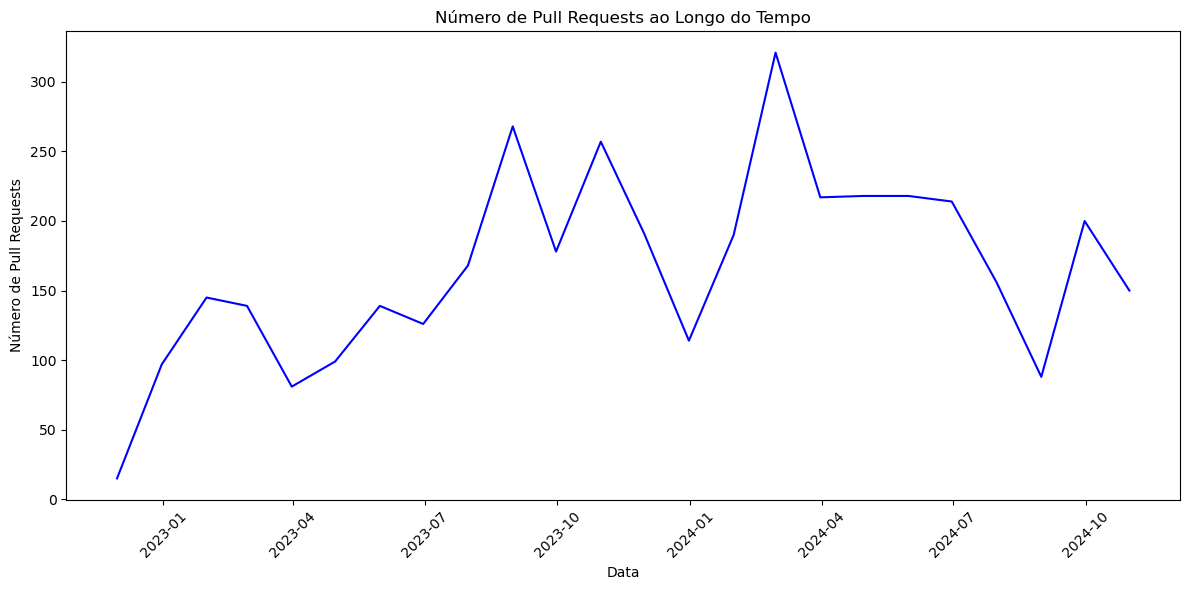

In [6]:
# Converter a coluna de data para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')

# Remover linhas onde a conversão falhou (se houver)
df_pr = df_pr.dropna(subset=['submitted_at'])

# Definir a coluna de data como índice
df_pr.set_index('submitted_at', inplace=True)

# Agrupar por mês e contar o número de pull requests
monthly_pull_requests = df_pr.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Pull Requests ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pull Requests')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [10]:
contagem_nomes_df = df_pr['author_login'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_login', 'frequencia']
print(contagem_nomes_df)
    

     author_login  frequencia
0        picklelo        1378
1          masenf        1205
2        Lendemor         385
3          Alek99         371
4   ElijahAhianyo         131
..            ...         ...
74    watfordsuzy           1
75          jdoss           1
76        RyleyGG           1
77      y9rabbito           1
78      bryan-trz           1

[79 rows x 2 columns]


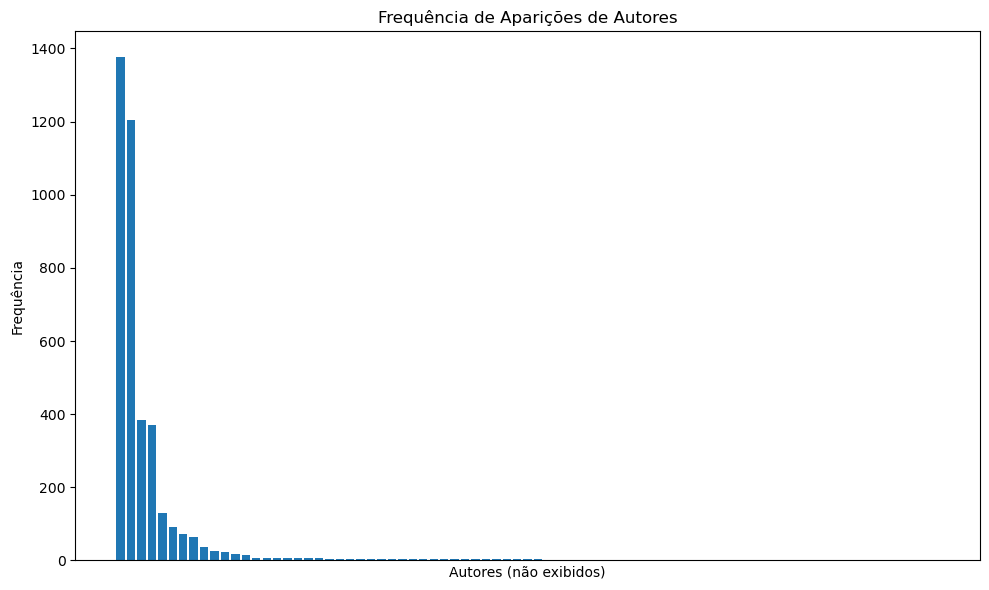

In [11]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_login'], contagem_nomes_df['frequencia'])

# Adicionar rótulos e título
plt.xlabel('Autores (não exibidos)')
plt.ylabel('Frequência')
plt.title('Frequência de Aparições de Autores')

# Remover os nomes do eixo X
plt.xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()


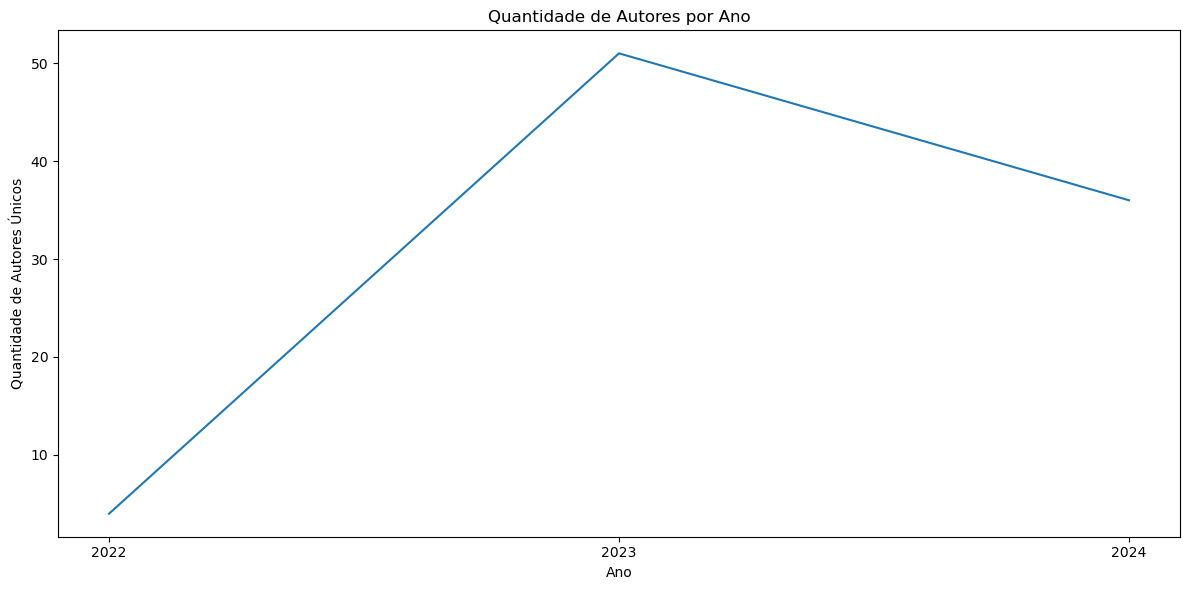

In [12]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_pr.groupby('year')['author_login'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [13]:
contagem_nomes_df = df_pr['author_association'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_association', 'frequencia']
print(contagem_nomes_df)


  author_association  frequencia
0        CONTRIBUTOR        1759
1       COLLABORATOR        1758
2             MEMBER         435
3               NONE          37


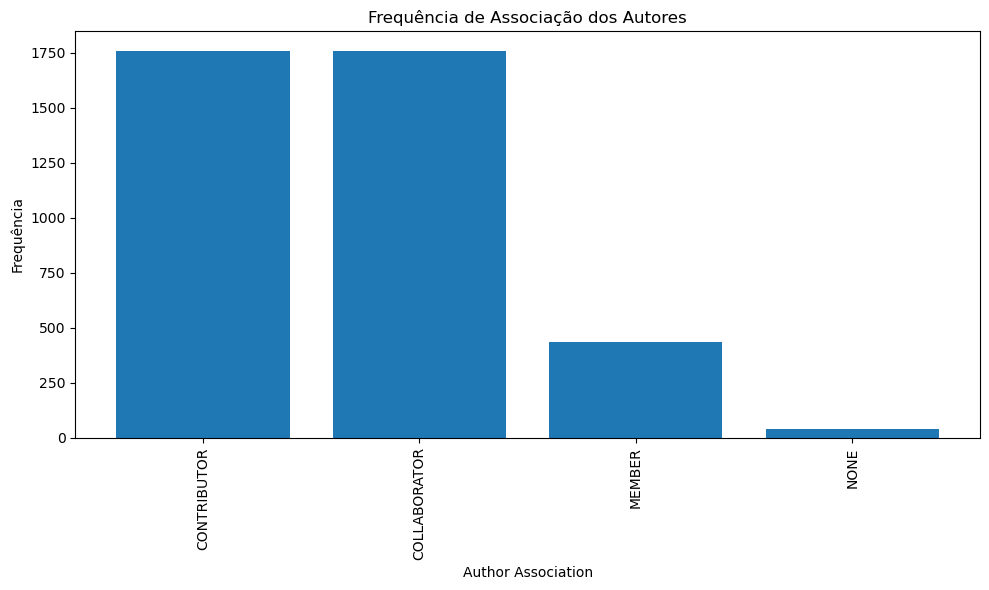

In [14]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_association'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('Author Association')
plt.ylabel('Frequência')
plt.title('Frequência de Associação dos Autores')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()

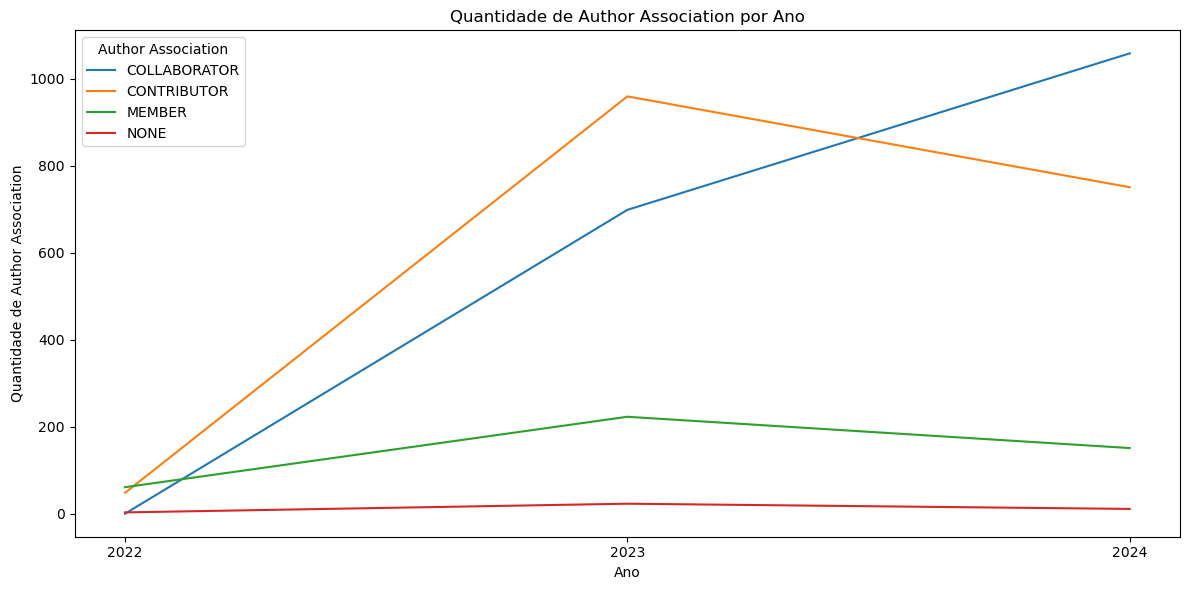

In [15]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de author_association únicos por ano
association_counts = df_pr.groupby(['year', 'author_association']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for association in association_counts.columns:
    plt.plot(association_counts.index, association_counts[association], marker='', linestyle='-', label=association)

plt.title('Quantidade de Author Association por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Author Association')
plt.xticks(association_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.legend(title='Author Association')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [16]:
contagem_nomes_df = df_pr['state'].value_counts().reset_index()
contagem_nomes_df.columns = ['state', 'frequencia']
print(contagem_nomes_df)


               state  frequencia
0           APPROVED        2036
1          COMMENTED        1451
2          DISMISSED         284
3  CHANGES_REQUESTED         218


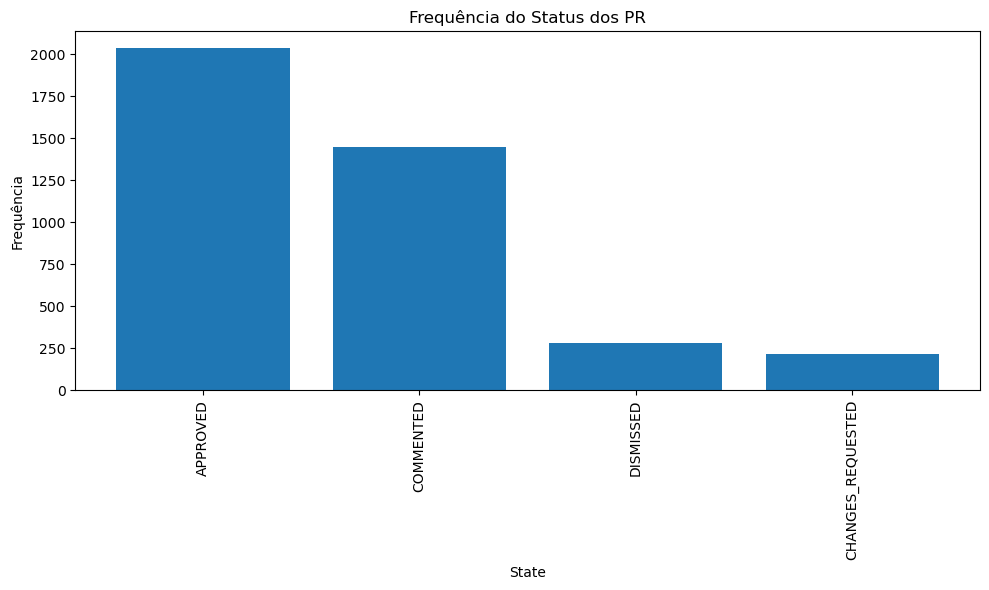

In [17]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['state'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('State')
plt.ylabel('Frequência')
plt.title('Frequência do Status dos PR')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()


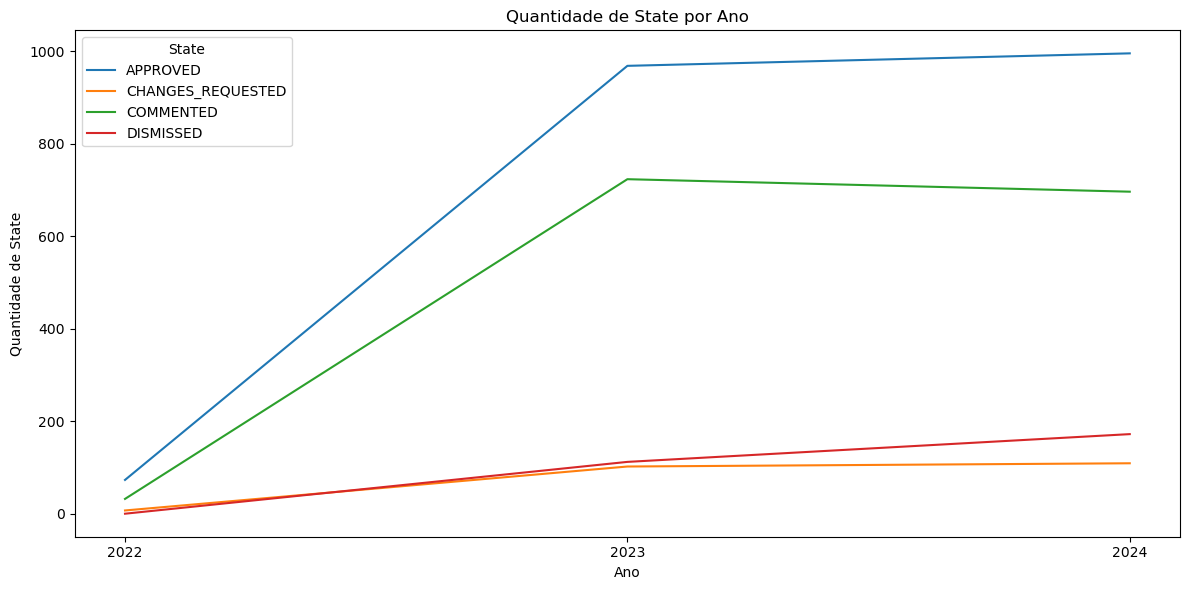

In [18]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de states por ano
state_counts = df_pr.groupby(['year', 'state']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for state in state_counts.columns:
    plt.plot(state_counts.index, state_counts[state], marker='', linestyle='-', label=state)

plt.title('Quantidade de State por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de State')
plt.xticks(state_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)  
plt.legend(title='State')
plt.tight_layout()

# Exibir o gráfico
plt.show()